# Marketing Campaigns

### Problem scenario:

Marketing mix stands as a widely utilized concept in the execution of marketing strategies. It encompasses various facts within a comprehensive marketing plan, with a central focus on the four Ps of marketing: product, price, place, and promotion.

Data description: 
 a. The variables such as birth year, education, income, and others pertain to the first 'P' or 'People' in the tabular data presented to the user.

 b. The expenditures on items like wine, fruits, and gold, are associated with ‘Product’. 
 
 c. Information relevant to sales channels, such as websites and stores, is connected to ‘Place’, and the fields discussing promotions and the outcomes of various campaigns are linked to ‘Promotion’.

### Problem objective:

To conduct exploratory data analysis and hypothesis testing to enhance our comprehension of the diverse factors influencing customer acquisition.
- Data Cleaning: handling missing values, converting data to required datatype, removing outliers, introducing new features, grouping data(Education, Marital_Status) based on income.
- Generation of box plots & histograms, outlier treatment with (Interquartile Range)IQR capping, correlation heatmap
- Ordinal Encoding and mapping based on Education level as (for category:Basic: 0,2Nd Cycle: 1, Graduation: 2,Master: 3,Phd: 4)
- one-hot encoding using pd.get_dummies to get new columns
-  Identify top-performing products & lowest revenue

- Hypothesis Testing:

     Hypothesis A:
    Older individuals prefer in-store shopping (NumStorePurchases).
    H0: Age >= threshold vs. Age < threshold have same mean store purchases.
    H1: Age >= threshold have higher store purchases.

    Hypothesis B:
    Customers with children, shop online more (NumWebPurchases).

     Hypothesis C:
    Cannibalization of physical stores by other channels.

     Hypothesis D:
    Does the US significantly outperform the rest of the world in total purchase volumes?
    Taking 'Country_US' from one-hot encoding:

In [45]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [46]:

# 1. Import the data 
df = pd.read_csv('marketing_data.csv')
display(df.head())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [48]:
df['Dt_Customer'].head()

0    6/16/14
1    6/15/14
2    5/13/14
3    5/11/14
4     4/8/14
Name: Dt_Customer, dtype: object

In [49]:

# # Convert Dt_Customer to datetime 
# df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
# df['Dt_Customer'].dtype


In [50]:

# Renaming the Income column in the csv, as it has trailing spaces; convert to numeric
df.rename(columns={' Income ': 'Income'}, inplace=True)
df['Income'].head()

0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
Name: Income, dtype: object

In [51]:

# Handle missing values in 'Income' + Clean Education / Marital_Status

# A) Convert 'Income' to numeric, removing symbols or commas
df['Income'] = (
    df['Income']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)  # remove $, commas
)
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

print("\nIncome column after numeric conversion:")
df['Income'].describe()



Income column after numeric conversion:


count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [52]:

missing_income = df['Income'].isnull().sum()
print(f"Number of missing values in 'Income': {missing_income}")


Number of missing values in 'Income': 24


In [53]:

# B) Clean 'Education' and 'Marital_Status' categories 
df['Education'].unique()


array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [54]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [55]:

df['Education'] = df['Education'].str.title().str.strip()
df['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4       Graduation
           ...    
2235           Phd
2236      2N Cycle
2237    Graduation
2238    Graduation
2239           Phd
Name: Education, Length: 2240, dtype: object

In [56]:
df['Marital_Status'] = df['Marital_Status'].str.title().str.strip()


In [57]:
df.groupby(['Education', 'Marital_Status'])['Income']
df.groupby(['Education', 'Marital_Status'])['Income'].agg(['count', 'mean', 'min', 'max'])


count          mean      min       max
Education  Marital_Status                                        
2N Cycle   Divorced           23  49395.130435  11448.0   87305.0
           Married            80  46201.100000   7500.0   96547.0
           Single             36  53673.944444  23331.0   89572.0
           Together           56  44736.410714   7500.0   92556.0
           Widow               5  51392.200000  28457.0   74859.0
Basic      Divorced            1   9548.000000   9548.0    9548.0
           Married            20  21960.500000   7500.0   34445.0
           Single             18  18238.666667   7500.0   26868.0
           Together           14  21240.071429   9722.0   28389.0
           Widow               1  22123.000000  22123.0   22123.0
Graduation Absurd              1  79244.000000  79244.0   79244.0
           Alone               1  34176.000000  34176.0   34176.0
           Divorced          119  54526.042017   1730.0  153924.0
           Married           429  50800.258741   2447.0   94642.0
           Single            246  51322.182927   3502.0  101970.0
           Together          285  55758.480702  13672.0  666666.0
           Widow              35  54976.657143  27038.0   85620.0
Master     Absurd              1  65487.000000  65487.0   65487.0
           Alone               1  61331.000000  61331.0   61331.0
           Divorced           37  50331.945946  10979.0   81380.0
           Married           138  53286.028986   7500.0   92163.0
           Single             75  53530.560000   6560.0   98777.0
           Together          102  52109.009804  14661.0  157733.0
           Widow              11  58401.545455  33051.0   84953.0
Phd        Alone               1  35860.000000  35860.0   35860.0
           Divorced           52  53096.615385  14849.0   90687.0
           Married           190  58138.031579   4023.0  160803.0
           Single             96  53314.614583   7144.0  113734.0
           Together          116  56041.422414   5648.0  162397.0
           Widow              24  60288.083333  25358.0   82571.0
           Yolo                2  48432.000000  48432.0   48432.0

In [58]:
df['Income'].isnull().sum()

24

In [59]:

# C) Impute missing 'Income' based on grouping (Education, Marital_Status)
fill_values = df.groupby(['Education', 'Marital_Status'])['Income'].transform('median')
fill_values


0       55635.0
1       49973.5
2       50737.0
3       53977.0
4       49973.5
         ...   
2235    50613.5
2236    46462.5
2237    55635.0
2238    50737.0
2239    57081.5
Name: Income, Length: 2240, dtype: float64

In [60]:
df['Income'] = df['Income'].fillna(fill_values)
df['Income']


0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [61]:

missing_income_after = df['Income'].isnull().sum()
missing_income_after

0

In [62]:

# STEP 3: Create new variables (Total_Children, Age, Total_Spending, etc.)

# a) Derive total purchases from the 3 channels (web, catalog, store)

# 1. Total number of children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# 2. Age (choose a reference year as current year --> 2025)
df['Age'] = 2025 - df['Year_Birth']

# 3. Total spending (sum of product spend columns)
product_cols = [
    'MntWines', 
    'MntFruits', 
    'MntMeatProducts', 
    'MntFishProducts', 
    'MntSweetProducts', 
    'MntGoldProds'
]
df['Total_Spending'] = df[product_cols].sum(axis=1)

# 4. Total Purchases (sum of purchases across channels)
df['Total_Purchases'] = (
    df['NumWebPurchases']
    + df['NumCatalogPurchases']
    + df['NumStorePurchases']
)

print("\nNew columns added:")
display(df[['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']].head())



New columns added:


,Total_Children,Age,Total_Spending,Total_Purchases
0,0,55,1190,14
1,0,64,577,17
2,1,67,251,10
3,2,58,11,3
4,1,36,91,6


In [63]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Total_Children',
       'Age', 'Total_Spending', 'Total_Purchases'],
      dtype='object')

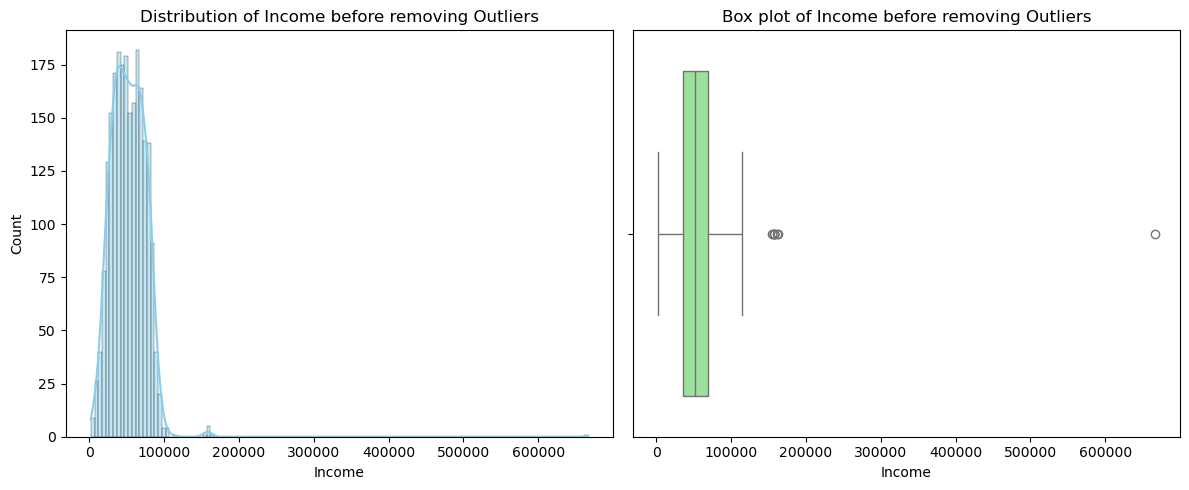

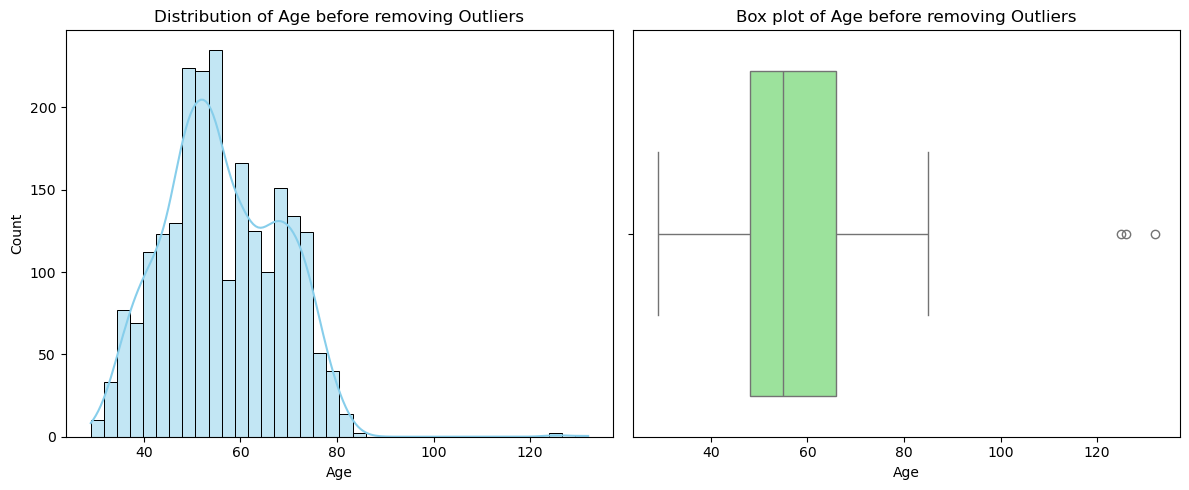

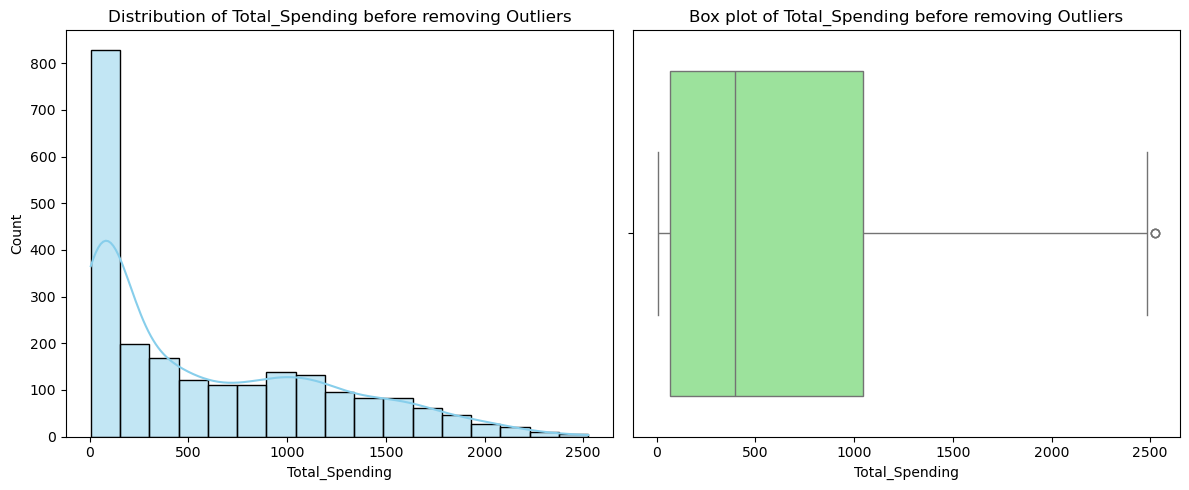

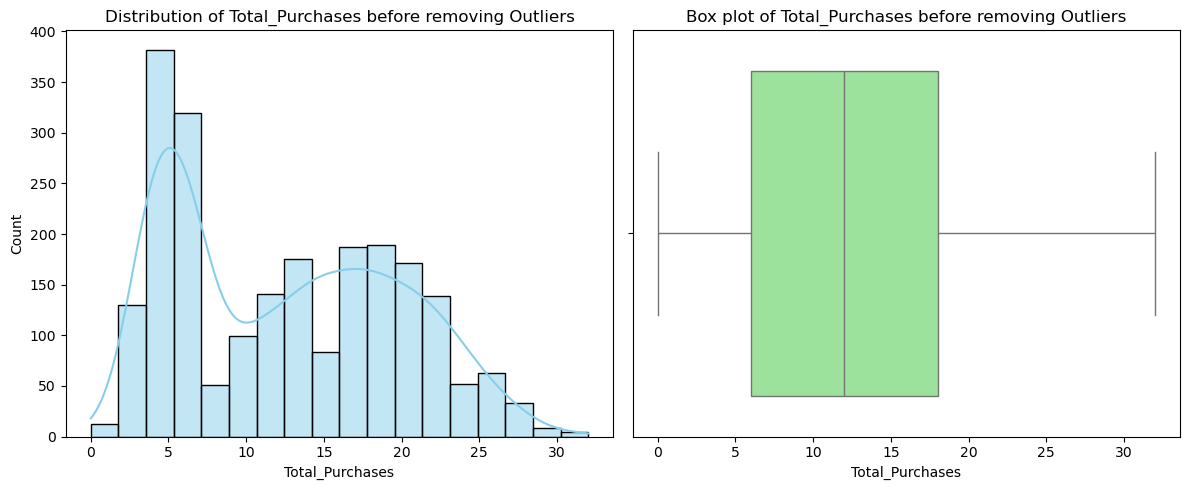

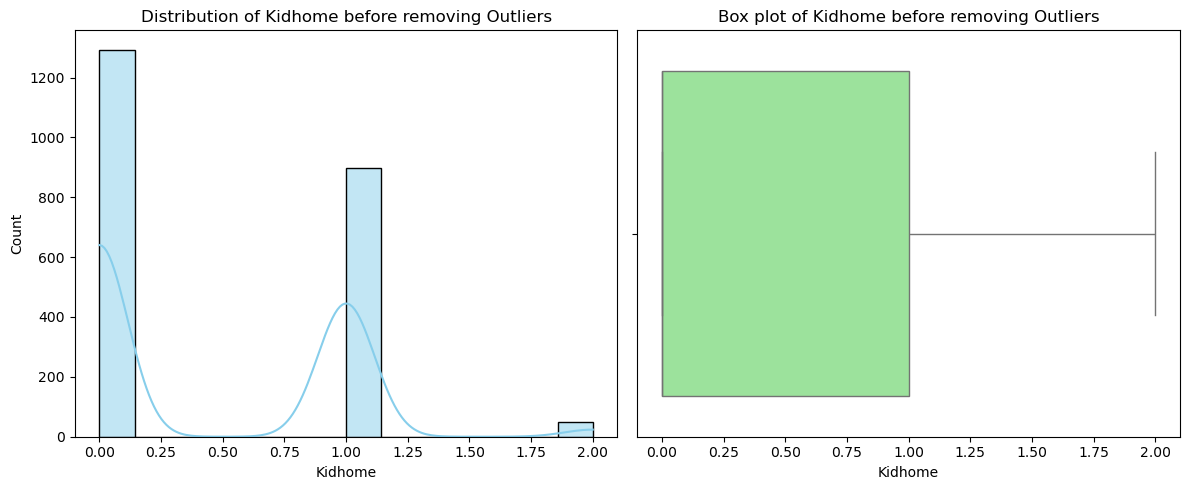

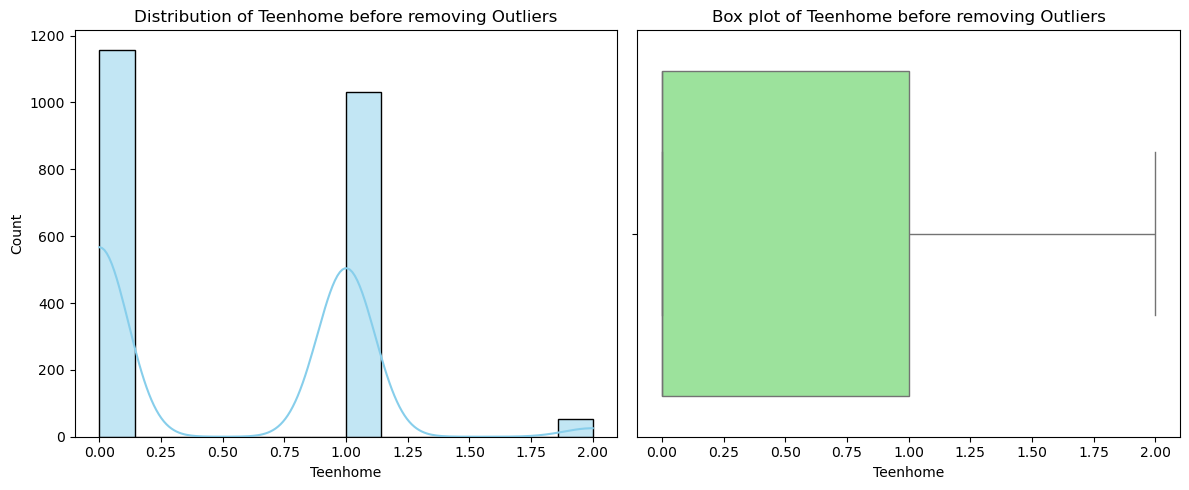

In [64]:

# STEP 4: Generate box plots & histograms + outlier treatment

numeric_cols = [
    'Income', 
    'Age', 
    'Total_Spending', 
    'Total_Purchases',
    'Kidhome',
    'Teenhome'
]

# A) Initial hist & box plots
for col in numeric_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col} before removing Outliers')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Box plot of {col} before removing Outliers')
    
    plt.tight_layout()
    plt.show()


In [65]:

# B) Outlier treatment with IQR capping
def cap_outliers_iqr(dataframe, col_name, factor=1.5):
    Q1 = dataframe[col_name].quantile(0.25)
    Q3 = dataframe[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    
    # Cap
    dataframe.loc[dataframe[col_name] < lower_bound, col_name] = lower_bound
    dataframe.loc[dataframe[col_name] > upper_bound, col_name] = upper_bound

for col in numeric_cols:
    if df[col].dtype in ['int64', 'float64']:
        cap_outliers_iqr(df, col, factor=1.5)


C:\Users\hp\AppData\Local\Temp\ipykernel_18628\902343312.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1396.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[dataframe[col_name] < lower_bound, col_name] = lower_bound
C:\Users\hp\AppData\Local\Temp\ipykernel_18628\902343312.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[dataframe[col_name] < lower_bound, col_name] = lower_bound
C:\Users\hp\AppData\Local\Temp\ipykernel_18628\902343312.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible 

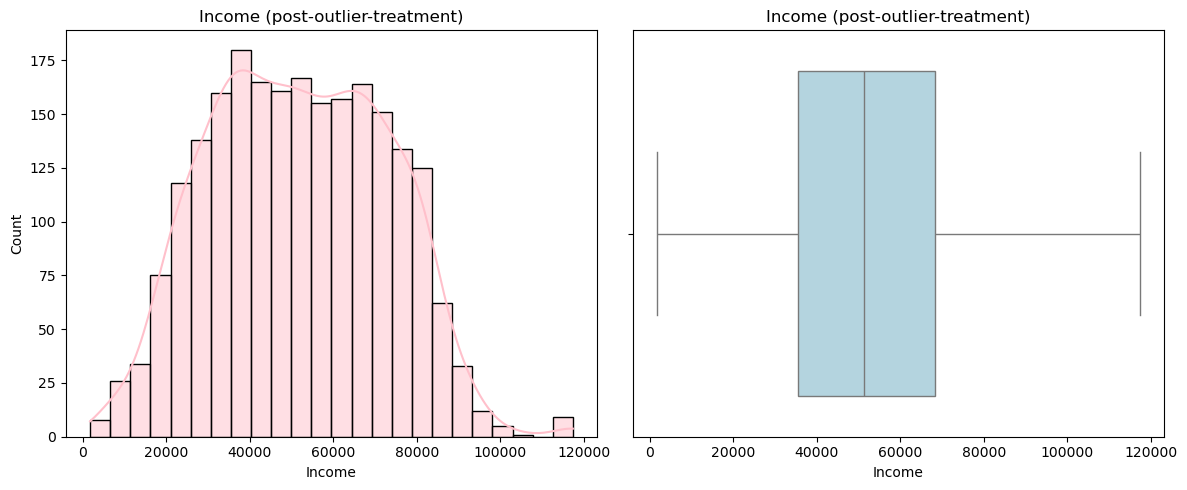

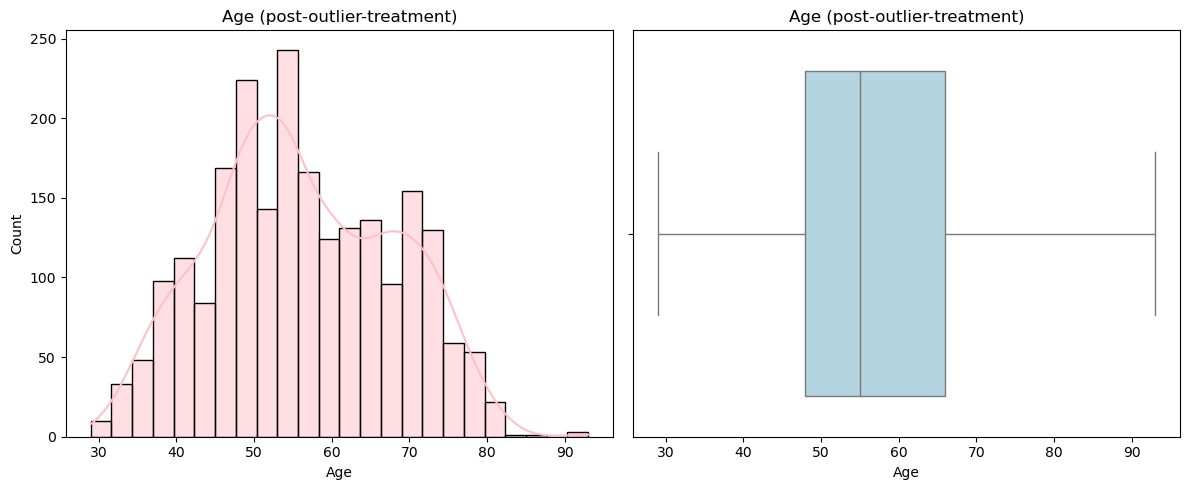

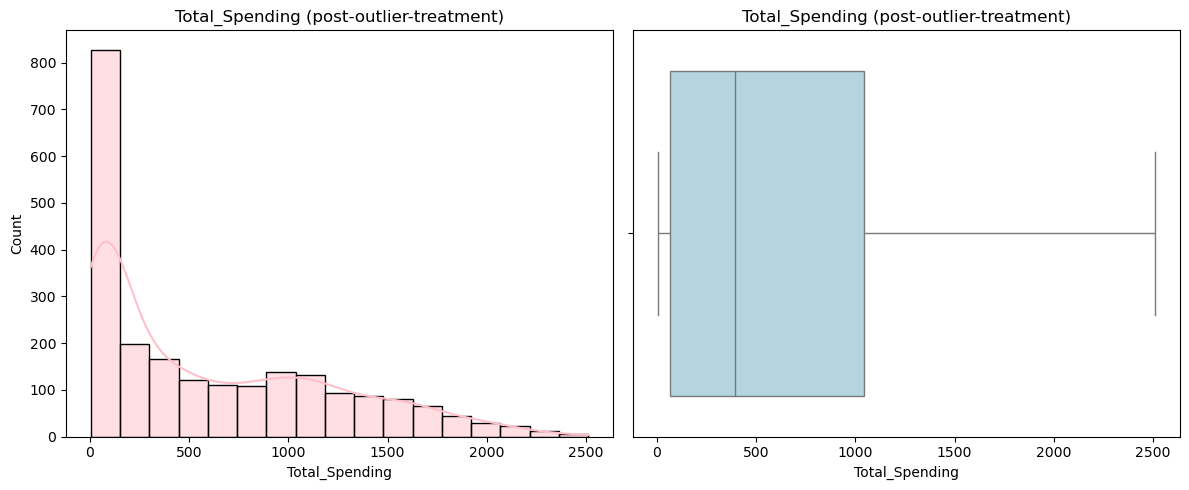

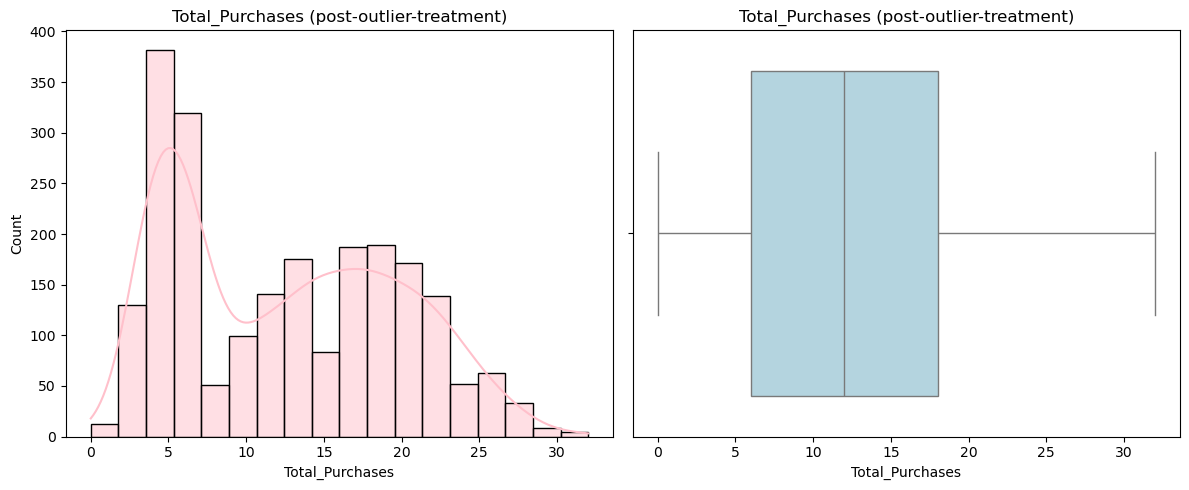

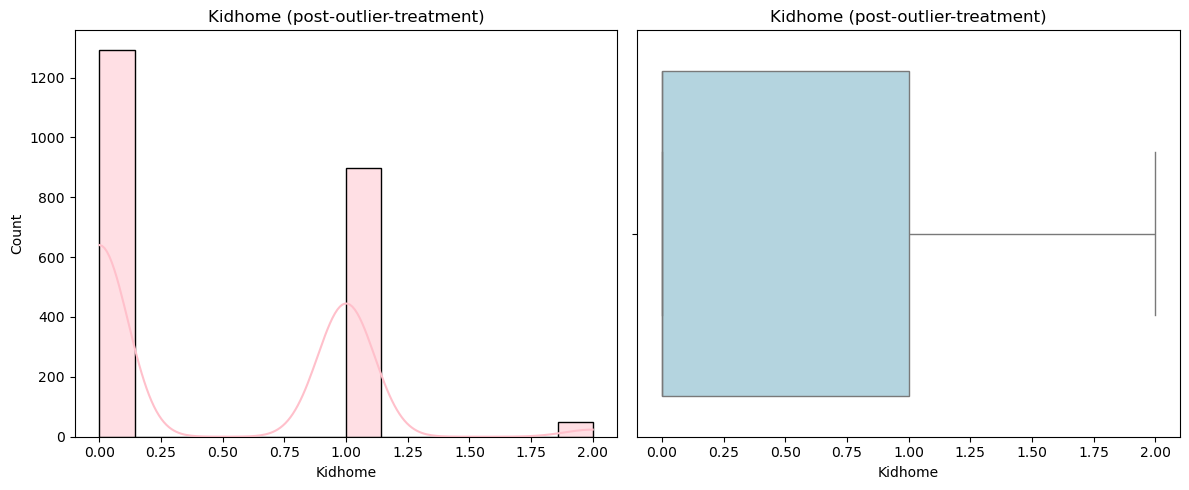

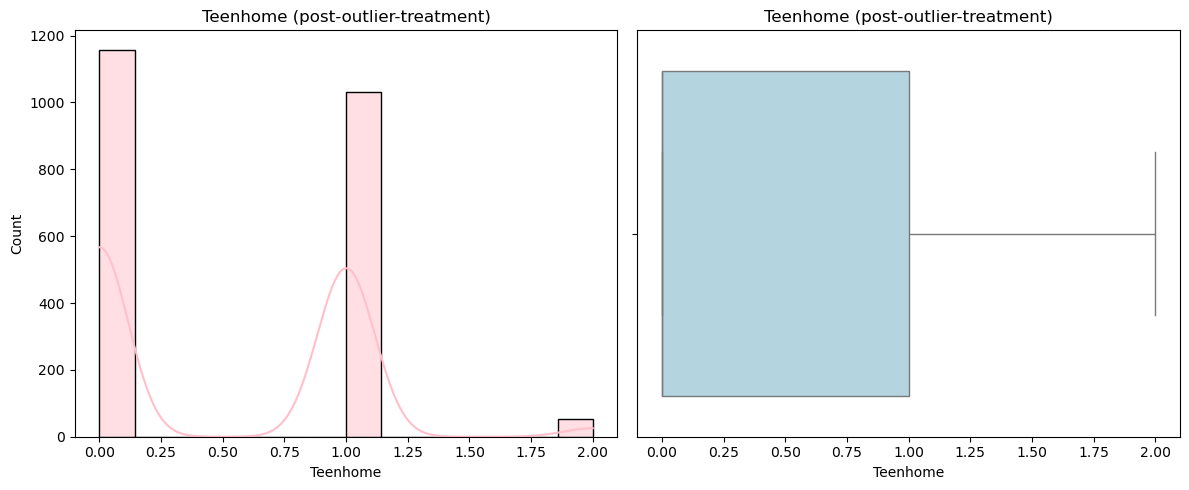

In [66]:

# C) Visualize again post-treatment 
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='pink')
    plt.title(f'{col} (post-outlier-treatment)')
    
    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'{col} (post-outlier-treatment)')
    
    plt.tight_layout()
    plt.show()


In [67]:

# STEP 5: Ordinal & One-Hot Encoding

# Ordinal Encoding for Education (adjust levels as needed)
print("\nUnique 'Education' values before ordinal mapping:")
print(df['Education'].unique())



Unique 'Education' values before ordinal mapping:
['Graduation' 'Phd' '2N Cycle' 'Master' 'Basic']


In [68]:

education_order = {
    "Basic": 0,
    "2Nd Cycle": 1,   
    "Graduation": 2,
    "Master": 3,
    "Phd": 4
}
df['Education_Encoded'] = df['Education'].map(education_order)

print("\nAfter ordinal encoding 'Education':")
display(df[['Education', 'Education_Encoded']].head())


After ordinal encoding 'Education':


,Education,Education_Encoded
0,Graduation,2.0
1,Graduation,2.0
2,Graduation,2.0
3,Graduation,2.0
4,Graduation,2.0


In [69]:
education_counts = df['Education_Encoded'].value_counts()
education_counts 

Education_Encoded
2.0    1127
4.0     486
3.0     370
0.0      54
Name: count, dtype: int64

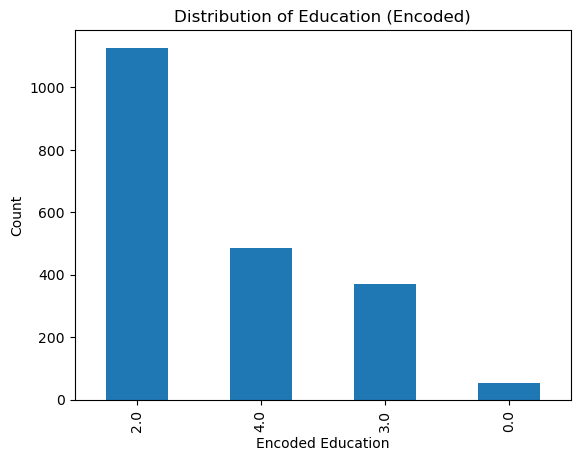

In [70]:
education_counts.plot(kind='bar')

plt.xlabel('Encoded Education')
plt.ylabel('Count')
plt.title('Distribution of Education (Encoded)')
plt.show()

In [71]:

# One-Hot for Marital_Status & Country 
df = pd.get_dummies(df, columns=['Marital_Status'], prefix='Marital', drop_first=True)
df = pd.get_dummies(df, columns=['Country'], prefix='Country', drop_first=True)

print("\nColumns after encoding:")
print(df.columns)


Columns after encoding:
Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Total_Children', 'Age', 'Total_Spending',
       'Total_Purchases', 'Education_Encoded', 'Marital_Alone',
       'Marital_Divorced', 'Marital_Married', 'Marital_Single',
       'Marital_Together', 'Marital_Widow', 'Marital_Yolo', 'Country_CA',
       'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP',
       'Country_US'],
      dtype='object')


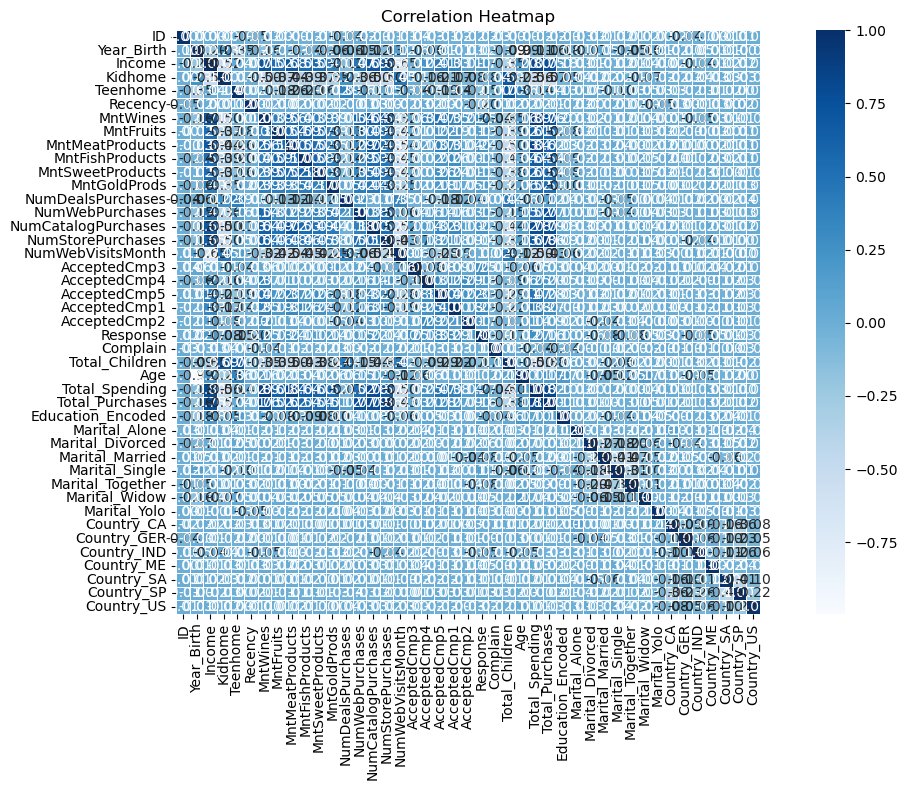

In [72]:

# STEP 6: Generate a correlation heatmap

plt.figure(figsize=(12,8))
corr_matrix = df.corr(numeric_only=True)  # in newer pandas versions
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", square=True, linewidths=.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_18628\2644959805.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_revenue.index, y=product_revenue.values, palette='Blues_r')


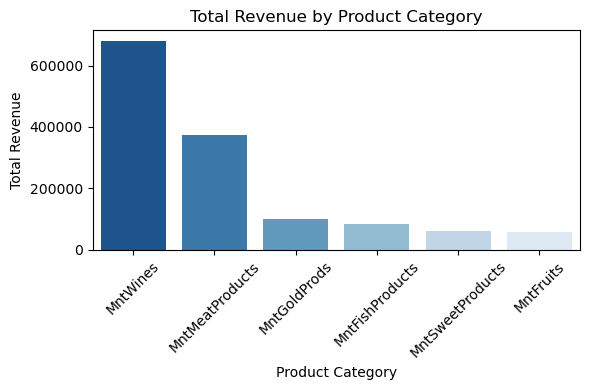


Product Revenues (Highest to Lowest):
MntWines            680816
MntMeatProducts     373968
MntGoldProds         98609
MntFishProducts      84057
MntSweetProducts     60621
MntFruits            58917
dtype: int64


In [73]:
# STEP 7: More Visualizations

# A) Identify top-performing products & lowest revenue
product_revenue = df[product_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=product_revenue.index, y=product_revenue.values, palette='Blues_r')
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nProduct Revenues (Highest to Lowest):")
print(product_revenue)


C:\Users\hp\AppData\Local\Temp\ipykernel_18628\541877327.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Response'], y=df['Age'], palette='Set2')


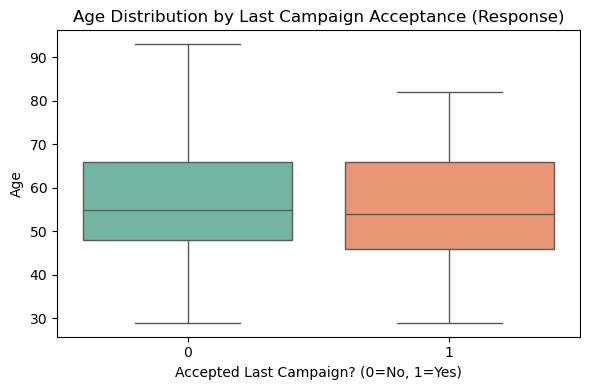


Correlation between Age and Last Campaign Acceptance: -0.02


In [74]:
# B) Correlation between age & acceptance of the last campaign
#    If 'Response' indicates acceptance of last campaign (1/0):
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Response'], y=df['Age'], palette='Set2')
plt.title("Age Distribution by Last Campaign Acceptance (Response)")
plt.xlabel("Accepted Last Campaign? (0=No, 1=Yes)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

corr_val = df['Age'].corr(df['Response'])
print(f"\nCorrelation between Age and Last Campaign Acceptance: {corr_val:.2f}")



Number of customers who accepted the last campaign by Country:
  Country  AcceptedCount
5      SP            176
4      SA             52
0      CA             38
1     GER             17
2     IND             13
6      US             13
3      ME              2


C:\Users\hp\AppData\Local\Temp\ipykernel_18628\2414048600.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_accept_df, x='Country', y='AcceptedCount', palette='viridis')


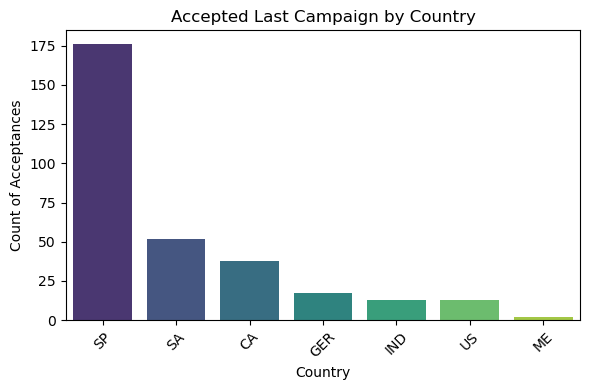

In [75]:
# C) Country with the highest number of customers who accepted the last campaign

country_cols = [col for col in df.columns if col.startswith('Country_')]
acceptance_counts = {}
for col in country_cols:
    c_name = col.replace('Country_', '')
    accepted_count = df[(df[col] == 1) & (df['Response'] == 1)].shape[0]
    acceptance_counts[c_name] = accepted_count

country_accept_df = pd.DataFrame(
    list(acceptance_counts.items()), columns=['Country', 'AcceptedCount']
).sort_values('AcceptedCount', ascending=False)

print("\nNumber of customers who accepted the last campaign by Country:")
print(country_accept_df)

plt.figure(figsize=(6,4))
sns.barplot(data=country_accept_df, x='Country', y='AcceptedCount', palette='viridis')
plt.title("Accepted Last Campaign by Country")
plt.xlabel("Country")
plt.ylabel("Count of Acceptances")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


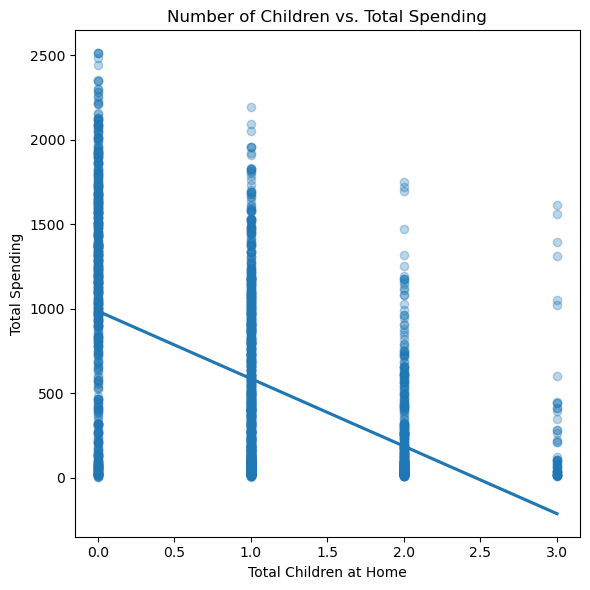


Correlation between Total Children and Total Spending: -0.49889763377575874


In [76]:
# D) Pattern between number of children & total expenditure
plt.figure(figsize=(6, 6))
sns.regplot(data=df, x='Total_Children', y='Total_Spending', ci=None, scatter_kws={'alpha': 0.3})
plt.title("Number of Children vs. Total Spending")
plt.xlabel("Total Children at Home")
plt.ylabel("Total Spending")
plt.tight_layout()
plt.show()

corr_children_spending = df['Total_Children'].corr(df['Total_Spending'])
print(f"\nCorrelation between Total Children and Total Spending: {corr_children_spending: }")



Number of Complaints by Education (last 2 years):
Education
Graduation    14
2N Cycle       4
Master         2
Phd            1
Name: ID, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_18628\1656896674.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complaints_by_education.index, y=complaints_by_education.values, palette='magma')


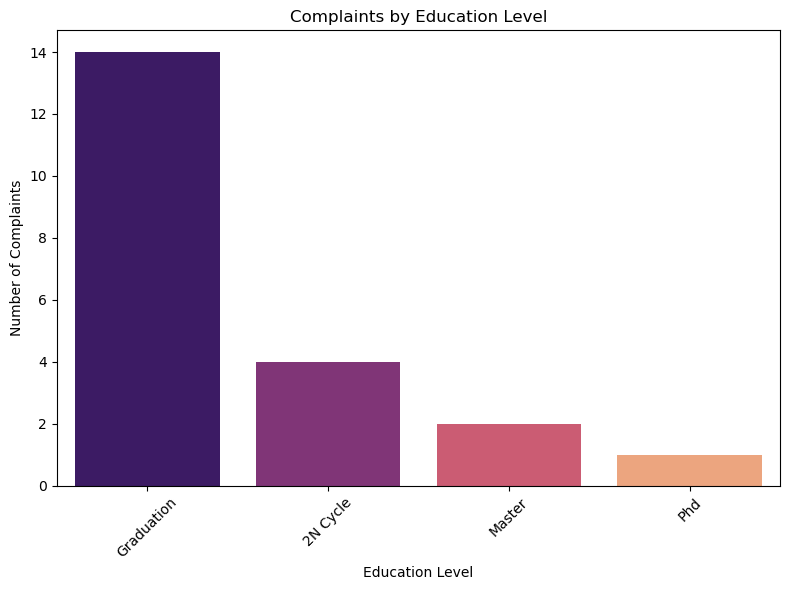

In [77]:
# E) Educational background of customers who lodged complaints in the last 2 years

complaints_by_education = (
    df[df['Complain'] == 1]
    .groupby('Education')['ID']
    .count()
    .sort_values(ascending=False)
)
print("\nNumber of Complaints by Education (last 2 years):")
print(complaints_by_education)
plt.figure(figsize=(8, 6))
sns.barplot(x=complaints_by_education.index, y=complaints_by_education.values, palette='magma')
plt.title("Complaints by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:


# STEP 8: Hypothesis Testing

# A) Hypothesis A:
#    Older individuals prefer in-store shopping (NumStorePurchases).
#    H0: Age >= threshold vs. Age < threshold have same mean store purchases.
#    H1: Age >= threshold have higher store purchases.

age_threshold = 60
older_store = df.loc[df['Age'] >= age_threshold, 'NumStorePurchases']
older_store

1       7
2       5
5       5
6       7
8       9
       ..
2202    3
2216    7
2217    7
2227    5
2233    2
Name: NumStorePurchases, Length: 860, dtype: int64

In [79]:

younger_store = df.loc[df['Age'] < age_threshold, 'NumStorePurchases']
younger_store


0        6
3        2
4        2
7        3
11       6
        ..
2235    11
2236     3
2237     5
2238    10
2239     4
Name: NumStorePurchases, Length: 1380, dtype: int64

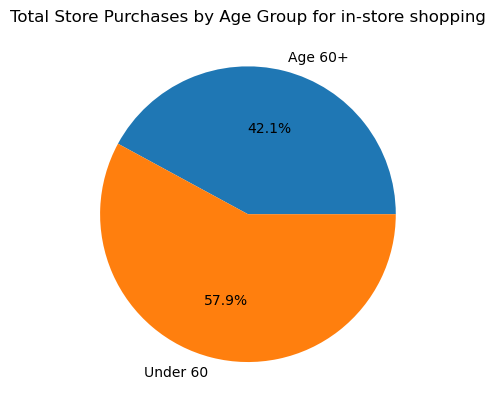

In [80]:
# Calculate the total purchases in each age group
older_total = older_store.sum()
younger_total = younger_store.sum()

# Create a Series to plot
purchases_by_age = pd.Series([older_total, younger_total], 
                             index=['Age 60+', 'Under 60'])

# Create a pie chart
purchases_by_age.plot(kind='pie', autopct='%1.1f%%')

plt.title('Total Store Purchases by Age Group for in-store shopping')
plt.ylabel('')  # Remove ylabel for a cleaner look
plt.show()

In [81]:

t_stat_a, p_val_a = stats.ttest_ind(older_store, younger_store, alternative='greater', nan_policy='omit')
print("\nHypothesis A: Older individuals prefer in-store shopping")
print(f"T-statistic: {t_stat_a:.4f}, P-value: {p_val_a:.2f}")



Hypothesis A: Older individuals prefer in-store shopping
T-statistic: 6.4652, P-value: 0.00


In [82]:
if p_val_a < 0.05:
    print(" Reject H0 in favor of H1: Older individuals indeed make more store purchases.")
else:
    print(" Fail to reject H0: No evidence that older individuals make more store purchases.")


 Reject H0 in favor of H1: Older individuals indeed make more store purchases.


In [83]:

# B) Hypothesis B:
#    Customers with children, shop online more (NumWebPurchases).
with_kids_web = df.loc[df['Total_Children'] > 0, 'NumWebPurchases']
no_kids_web = df.loc[df['Total_Children'] == 0, 'NumWebPurchases']

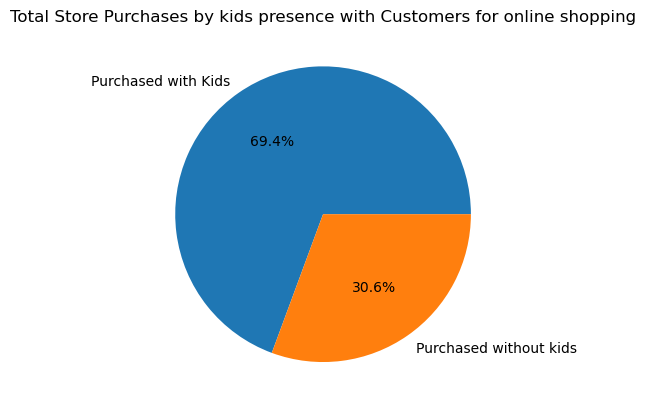

In [84]:
# Calculate the total purchases in each age group
with_kids_total = with_kids_web.sum()
no_kids_total = no_kids_web.sum()

# Create a Series to plot
purchases_by_kids_presence = pd.Series([with_kids_total, no_kids_total], 
                             index=['Purchased with Kids', 'Purchased without kids'])

# Create a pie chart
purchases_by_kids_presence.plot(kind='pie', autopct='%1.1f%%')

plt.title('Total Store Purchases by kids presence with Customers for online shopping')
plt.ylabel('')  # Remove ylabel for a cleaner look
plt.show()

In [85]:

t_stat_b, p_val_b = stats.ttest_ind(with_kids_web, no_kids_web, alternative='greater', nan_policy='omit')
print("\nHypothesis B: Customers with children shop online more")
print(f"T-statistic: {t_stat_b:.2f}, P-value: {p_val_b:.2f}")



Hypothesis B: Customers with children shop online more
T-statistic: -3.32, P-value: 1.00


In [86]:
if p_val_b < 0.05:
    print("Reject H0: Customers with children have significantly higher web purchases.")
else:
    print("Fail to reject H0: No evidence that customers with children shop online more.")

Fail to reject H0: No evidence that customers with children shop online more.


In [87]:

# C) Hypothesis C:
#    Cannibalization of physical stores by other channels.
store_purchases = df['NumStorePurchases']
web_purchases = df['NumWebPurchases']
catalog_purchases = df['NumCatalogPurchases']

corr_sw, p_sw = stats.pearsonr(store_purchases, web_purchases)
corr_sc, p_sc = stats.pearsonr(store_purchases, catalog_purchases)

print("\nHypothesis C: Cannibalization of physical stores by other channels")
print(f"Store vs Web correlation: r = {corr_sw:.4f}, p = {p_sw:.4f}")
print(f"Store vs Catalog correlation: r = {corr_sc:.4f}, p = {p_sc:.4f}")
if corr_sw < 0 and p_sw < 0.05:
    print("-> Negative correlation suggests cannibalization (Store vs Web).")
else:
    print("No strong evidence of negative correlation for Store vs Web.")
if corr_sc < 0 and p_sc < 0.05:
    print("Negative correlation suggests cannibalization (Store vs Catalog).")
else:
    print("No strong evidence of negative correlation for Store vs Catalog.")



Hypothesis C: Cannibalization of physical stores by other channels
Store vs Web correlation: r = 0.5027, p = 0.0000
Store vs Catalog correlation: r = 0.5187, p = 0.0000
No strong evidence of negative correlation for Store vs Web.
No strong evidence of negative correlation for Store vs Catalog.


In [88]:

# D) Hypothesis D:
#    Does the US significantly outperform the rest of the world in total purchase volumes?
#    Taking 'Country_US' from one-hot encoding:

us_data = df.loc[df['Country_US'] == 1, 'Total_Purchases']
non_us_data = df.loc[df['Country_US'] == 0, 'Total_Purchases']
t_stat_d, p_val_d = stats.ttest_ind(us_data, non_us_data, alternative='greater', nan_policy='omit')
print("\nHypothesis D: US vs. rest of world in total purchase volumes")
print(f"T-statistic: {t_stat_d:.4f}, P-value: {p_val_d:.4f}")
if p_val_d < 0.05:
    print("Reject H0: US customers have significantly higher total purchase volumes.")
else:
    print("Fail to reject H0: No strong evidence the US outperforms others.")



Hypothesis D: US vs. rest of world in total purchase volumes
T-statistic: 1.4512, P-value: 0.0734
Fail to reject H0: No strong evidence the US outperforms others.
